In [ ]:
# Packages for analysis
import pandas as pd
import numpy as np
from sklearn import svm

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

# Allows charts to appear in the notebook
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!wget https://raw.githubusercontent.com/adashofdata/muffin-cupcake/master/recipes_muffins_cupcakes_scones.csv

--2020-09-07 03:15:25--  https://raw.githubusercontent.com/adashofdata/muffin-cupcake/master/recipes_muffins_cupcakes_scones.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 754 [text/plain]
Saving to: ‘recipes_muffins_cupcakes_scones.csv’

recipes_muffins_cup 100%[===================>]     754  --.-KB/s    in 0s      

2020-09-07 03:15:25 (32.5 MB/s) - ‘recipes_muffins_cupcakes_scones.csv’ saved [754/754]



In [ ]:
# Read in muffin and cupcake ingredient data
recipes = pd.read_csv('/content/recipes_muffins_cupcakes_scones.csv')
recipes[0:5]

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


In [ ]:
# Specify inputs for the model
# ingredients = recipes[['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']].as_matrix()
ingredients = recipes[['Sugar','Butter']].values
recipes["Type_lbl"]=recipes["Type"].map({'Muffin': 1, 'Cupcake': 2,'Scone':3})
#type_label=recipes.replace({'Type': mapping})


In [ ]:
recipes[0:5]

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt,Type_lbl
0,Muffin,55,28,3,7,5,2,0,0,1
1,Muffin,47,24,12,6,9,1,0,0,1
2,Muffin,47,23,18,6,4,1,0,0,1
3,Muffin,45,11,17,17,8,1,0,0,1
4,Muffin,50,25,12,6,5,2,1,0,1


In [ ]:
pd.unique(recipes['Type']) 

array(['Muffin', 'Cupcake', 'Scone'], dtype=object)

In [ ]:
pd.unique(recipes['Type_lbl'])   

array([1, 2, 3])

In [ ]:
ingredients[0:5]                    #x

array([[ 3,  7],
       [12,  6],
       [18,  6],
       [17, 17],
       [12,  6]])

In [ ]:
label=recipes['Type_lbl'].values     #y
label[0:5]

array([1, 1, 1, 1, 1])

In [ ]:
label.shape

(25,)

In [ ]:
model = svm.SVC(kernel='linear',C=2**-5)
model.fit(ingredients,label)

SVC(C=0.03125, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


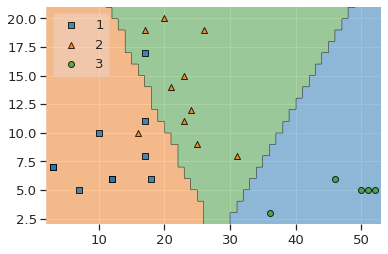

In [ ]:

from mlxtend.plotting import plot_decision_regions

plot_decision_regions(ingredients,label, clf=model, legend=2)

In [ ]:
model.predict([[50,10]])

array([3])

In [ ]:

# Create a function to guess when a recipe is a muffin or a cupcake
def muffin_or_cupcake(sugar,Butter):
  prd_cl=model.predict([[sugar,Butter]])
  if prd_cl==1:
    print('You\'re looking at a cupcake recipe!')
  elif prd_cl==2:
    print('You\'re looking at a muffin recipe!')
  else:
    print('You\'re looking at a scone recipe!')


In [ ]:
muffin_or_cupcake(10,10)

You're looking at a cupcake recipe!


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


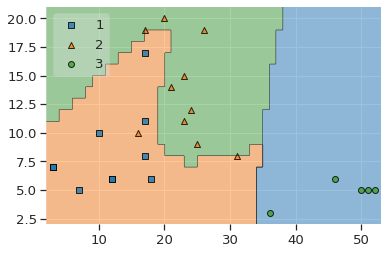

In [ ]:
model = svm.SVC(kernel='poly',degree=4, gamma=2**-5,C=1)
model.fit(ingredients,label)
plot_decision_regions(ingredients,label, clf=model, legend=2)

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


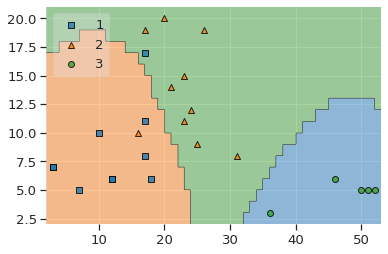

In [ ]:
model = svm.SVC(kernel='rbf',gamma=2**-5,C=1)
model.fit(ingredients,label)
plot_decision_regions(ingredients,label, clf=model, legend=2)